In [ ]:
# from https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e

In [34]:
! pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [1]:
import pandas as pd

%matplotlib inline

In [35]:
!pip install lifelines

     |████████████████████████████████| 348 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 5.1 MB/s eta 0:00:011
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=5d7f5051b9f89e767d4ee9875002900d2501c6e101d07bbf8d2929ff252f254e
  Stored in directory: /Users/jnesnky/Library/Caches/pip/wheels/85/f5/d2/3ef47d3a836b17620bf41647222825b065245862d12aa62885
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4034 sha256=66ab658cb2dff99fdd27e774fb0af3e02a9180997cc8743e0af2270f1db4d938
  Stored in directory: /Users/jnesnky/Library/Caches/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd autograd-gamma


In [3]:
file = "data/predictive maintenance trainALL.csv"

df = pd.read_csv(file)

In [4]:
df.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,max,RUL
count,160359.000000,160359.000000,1.603590e+05,160359.000000,1.603590e+05,1.603590e+05,1.603590e+05,1.603590e+05,1.603590e+05,1.603590e+05,...,1.603590e+05,1.603590e+05,160359.000000,1.603590e+05,1.603590e+05,1.603590e+05,1.603590e+05,1.603590e+05,160359.000000,160359.000000
mean,105.553758,123.331338,5.508654e-01,0.623385,8.931086e-01,5.543761e-01,4.052417e-01,4.671715e-01,4.332961e-01,5.588235e-01,...,4.431064e-01,4.159746e-01,0.518585,4.582714e-01,7.584652e-01,8.931086e-01,4.020479e-01,4.060048e-01,245.662676,122.331338
std,72.867325,83.538146,3.069203e-01,0.347725,3.089761e-01,4.129278e-01,2.994060e-01,2.536199e-01,2.560354e-01,3.982777e-01,...,2.241118e-01,2.500079e-01,0.499608,2.569065e-01,3.012962e-01,3.089761e-01,3.019566e-01,3.023379e-01,76.475379,83.538146
min,1.000000,1.000000,2.380000e-08,0.000001,2.500000e-08,1.360000e-08,9.180000e-09,2.700000e-09,2.400000e-09,9.340000e-08,...,2.380000e-09,3.460000e-07,0.000100,1.030000e-08,2.110000e-09,6.640000e-08,3.360000e-08,5.620000e-08,128.000000,0.000000
25%,44.000000,57.000000,3.506120e-01,0.297744,1.000000e+00,6.026878e-02,1.323664e-01,3.004470e-01,2.430647e-01,1.465921e-01,...,2.148583e-01,3.084727e-01,0.000100,2.916667e-01,6.279070e-01,1.000000e+00,1.412715e-01,1.443947e-01,191.000000,56.000000
50%,89.000000,114.000000,5.402563e-01,0.736580,1.000000e+00,5.979368e-01,3.512882e-01,3.961195e-01,3.709828e-01,5.079366e-01,...,5.272080e-01,3.804557e-01,1.000000,3.636364e-01,8.541226e-01,1.000000e+00,4.642860e-01,4.667414e-01,226.000000,113.000000
75%,164.000000,173.000000,8.332127e-01,0.997625,1.000000e+00,1.000000e+00,6.407197e-01,6.680776e-01,6.333586e-01,1.000000e+00,...,6.180297e-01,5.200398e-01,1.000000,6.666667e-01,1.000000e+00,1.000000e+00,6.200274e-01,6.228346e-01,285.000000,172.000000
max,260.000000,543.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,543.000000,542.000000


In [10]:
df.head()

,source,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,...,s15,s16,s17,s18,s19,s20,s21,max,RUL,Category
0,train2,1,1,0.833134,0.997625,1.000000e+00,6.026878e-02,0.181576,0.311201,0.273095,...,0.369948,0.0001,0.322917,6.511628e-01,1.000000e+00,0.156036,0.159082,149,148,Heathly
1,train2,1,2,0.999767,0.998575,1.000000e+00,1.360000e-08,0.131847,0.296600,0.245535,...,0.381408,0.0001,0.281250,6.279070e-01,1.000000e+00,0.007888,0.014562,149,147,Heathly
2,train2,1,3,0.595096,0.738480,2.500000e-08,2.380888e-01,0.016332,0.035297,0.056997,...,0.936731,0.0001,0.062500,2.110000e-09,6.640000e-08,0.133745,0.151414,149,146,Heathly
3,train2,1,4,0.999993,0.999525,1.000000e+00,1.360000e-08,0.128269,0.298795,0.246979,...,0.372401,0.0001,0.270833,6.279070e-01,1.000000e+00,0.014060,0.026144,149,145,Heathly
4,train2,1,5,0.595137,0.736699,2.500000e-08,2.380888e-01,0.014130,0.037871,0.058152,...,0.937537,0.0001,0.062500,2.110000e-09,6.640000e-08,0.135460,0.143240,149,144,Heathly


In [27]:
max_rul = df.groupby('id')['max'].max()

In [28]:
len(max_rul)

260

In [30]:
max_rul = pd.DataFrame(max_rul)

In [31]:
max_rul["observed"] = 1

In [32]:
max_rul.head()

,max,observed
id,,
1,321,1
2,299,1
3,307,1
4,274,1
5,269,1


<AxesSubplot:xlabel='timeline'>

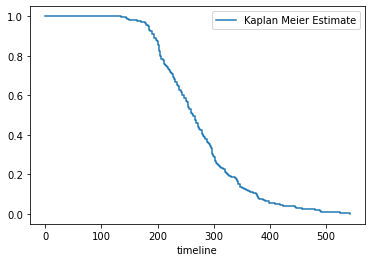

In [36]:
# Python code to create the above Kaplan Meier curve
from lifelines import KaplanMeierFitter

## Example Data 
durations = max_rul["max"]
event_observed = max_rul["observed"]

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

In [37]:
kmf

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 260 total observations, 0 right-censored observations>

<AxesSubplot:xlabel='timeline'>

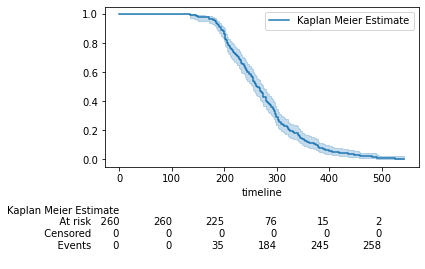

In [38]:
kmf.plot(at_risk_counts=True)

In [14]:
import lifelines

lifelines.utils.qth_survival_time(.9, kmf)

2.5

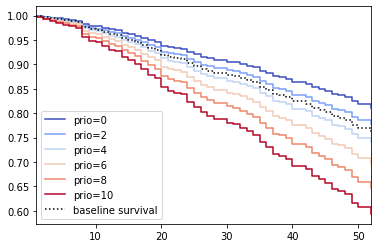

In [15]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

cph.plot_covariate_groups('prio', [0, 2, 4, 6, 8, 10], cmap='coolwarm')

In [16]:
rossi_dataset

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3
